## Pengolahan Data Praktikum Fisika Lanjutan 1
## Shawn Michael D.I. - 2106632314

# Import Libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Untuk Regresi Linear
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Untuk Curve Fitting
from scipy.optimize import curve_fit

# Mengganti Plot Style
plt.style.use("ggplot")

# M - Torsional Oscillator


## Percobaan 1: Menghitung Konstanta Torsi (k)



In [ ]:
# Membuat data dalam format dataframe
data1 = pd.DataFrame({"Massa (gr)":[50, 100, 150, 200, 250, 300, 350, 400], "Simpangan (rad)":[3.2, 3.28, 3.4, 3.5, 3.58, 3.64, 3.68, 3.72]})

In [ ]:
# Cek jumlah baris dan kolom
data1.shape

(8, 2)

In [ ]:
# Cek dataframe
data1

,Massa (gr),Simpangan (rad)
0,50,3.20
1,100,3.28
2,150,3.40
3,200,3.50
4,250,3.58
5,300,3.64
6,350,3.68
7,400,3.72


In [ ]:
# Mengkonversi massa ke kilogram dan Membuat kolom perubahan simpangan pada dataframe dengan simpangan awal
simpangan_awal = 3.00
data1["Massa (kg)"] = data1["Massa (gr)"] * 0.001
data1.drop(["Massa (gr)"], axis = 1, inplace = True)
data1["Perubahan Simpangan (rad)"] = data1["Simpangan (rad)"] - simpangan_awal
data1.drop(["Simpangan (rad)"], axis = 1, inplace = True)

In [ ]:
# Membaca dataframe dengan kolom delta simpangan (rad)
data1

,Massa (kg),Perubahan Simpangan (rad)
0,0.05,0.20
1,0.10,0.28
2,0.15,0.40
3,0.20,0.50
4,0.25,0.58
5,0.30,0.64
6,0.35,0.68
7,0.40,0.72


In [ ]:
data1["xy"] = data1["Massa (kg)"]*data1["Perubahan Simpangan (rad)"]
data1["x2"] = data1["Massa (kg)"]**2

In [ ]:
data1

,Massa (kg),Perubahan Simpangan (rad),xy,x2
0,0.05,0.20,0.010,0.0025
1,0.10,0.28,0.028,0.0100
2,0.15,0.40,0.060,0.0225
3,0.20,0.50,0.100,0.0400
4,0.25,0.58,0.145,0.0625
5,0.30,0.64,0.192,0.0900
6,0.35,0.68,0.238,0.1225
7,0.40,0.72,0.288,0.1600


In [ ]:
data1.describe()

,Massa (kg),Perubahan Simpangan (rad),xy,x2
count,8.000000,8.000000,8.000000,8.000000
mean,0.225000,0.500000,0.132625,0.063750
std,0.122474,0.190938,0.100886,0.056458
min,0.050000,0.200000,0.010000,0.002500
25%,0.137500,0.370000,0.052000,0.019375
50%,0.225000,0.540000,0.122500,0.051250
75%,0.312500,0.650000,0.203500,0.098125
max,0.400000,0.720000,0.288000,0.160000


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     177.7
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.10e-05
Time:                        16:48:25   Log-Likelihood:                 16.116
No. Observations:                   8   AIC:                            -28.23
Df Residuals:                       6   BIC:                            -28.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1550      0.029      5.338      0.0

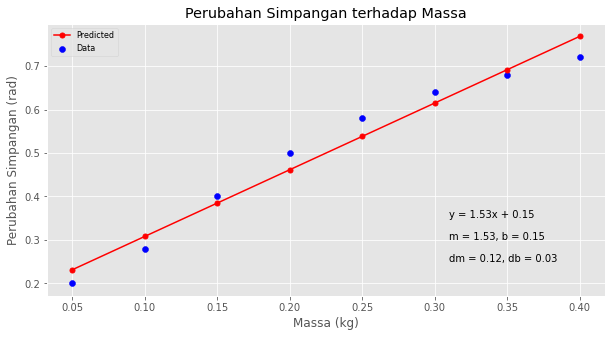

In [ ]:
# Menggunakan Library Statsmodels

# Mendefinisikan variabel bebas dan terikat
x = np.array(data1["Massa (kg)"])
y = np.array(data1["Perubahan Simpangan (rad)"])

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("Perubahan Simpangan terhadap Massa")
plt.xlabel("Massa (kg)")
plt.ylabel("Perubahan Simpangan (rad)")
plt.text(0.31, 0.35, "y = " + str(results.params[1].round(2)) + "x + " + str(results.params[0].round(2)))
plt.text(0.31, 0.3, "m = " + str(results.params[1].round(2)) + ", b = " + str(results.params[0].round(2)))
plt.text(0.31, 0.25, "dm = " + str(results.bse[1].round(2)) + ", db = " + str(results.bse[0].round(2)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Grafik Percobaan 1.png")

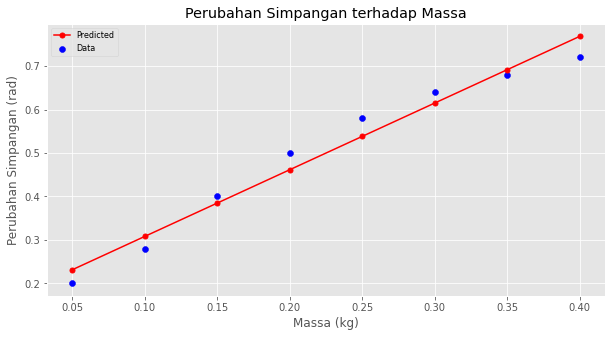

In [ ]:
# Menggunakan Library Scikitlearn

# Mendefinisikan variabel bebas dan terikat
x = data1[["Massa (kg)"]]
y = data1[["Perubahan Simpangan (rad)"]]

# Menggunakan linear regression dari scikitlearn
model = LinearRegression()
model.fit(x, y)
y_preds = model.predict(x)

# Membuat plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("Perubahan Simpangan terhadap Massa")
plt.xlabel("Massa (kg)")
plt.ylabel("Perubahan Simpangan (rad)")
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Grafik Percobaan 1.png")

In [ ]:
# Menghitung Konstanta Torsi, Ketidakpastiannya, dan Kesalahan Relatif
g = 9.8
r = 0.0125
kbar = (2*g*r) / results.params[1]
dkbar = kbar * (results.bse[1] / results.params[1])
krel = np.abs(dkbar / kbar) * 100
print("k+dk = " + str(kbar) + "+" + str(dkbar))
print("krel = " + str(krel) + "%")

k+dk = 0.15978260869565203+0.011984834265515817
krel = 7.500712601547321%


## Percobaan 2: Menyelidiki Hubungan Amplitudo dengan Periode

In [ ]:
data2 = pd.DataFrame({"Simpangan (rad)":[i*0.1 for i in range(1, 11)], "t1 (s)":[17]*10, "t2 (s)":[17]*9+[18], "t3 (s)":[16, 17, 18, 17, 18, 17, 17, 17, 17, 17]})

In [ ]:
data2.shape

(10, 4)

In [ ]:
data2

,Simpangan (rad),t1 (s),t2 (s),t3 (s)
0,0.1,17,17,16
1,0.2,17,17,17
2,0.3,17,17,18
3,0.4,17,17,17
4,0.5,17,17,18
5,0.6,17,17,17
6,0.7,17,17,17
7,0.8,17,17,17
8,0.9,17,17,17
9,1.0,17,18,17


In [ ]:
N = 15
data2["t rata2 (s)"] = data2.iloc[:, 1:4].mean(axis = 1).round(2)
data2["Periode (s)"] = (data2["t rata2 (s)"] / N).round(2)
data2["Periode^2 (s^2)"] = (data2["Periode (s)"]**2).round(2)
data2.drop(["t1 (s)", "t2 (s)", "t3 (s)"], axis = 1, inplace = True)

In [ ]:
data2.shape

(10, 4)

In [ ]:
data2

,Simpangan (rad),t rata2 (s),Periode (s),Periode^2 (s^2)
0,0.1,16.67,1.11,1.23
1,0.2,17.00,1.13,1.28
2,0.3,17.33,1.16,1.35
3,0.4,17.00,1.13,1.28
4,0.5,17.33,1.16,1.35
5,0.6,17.00,1.13,1.28
6,0.7,17.00,1.13,1.28
7,0.8,17.00,1.13,1.28
8,0.9,17.00,1.13,1.28
9,1.0,17.33,1.16,1.35


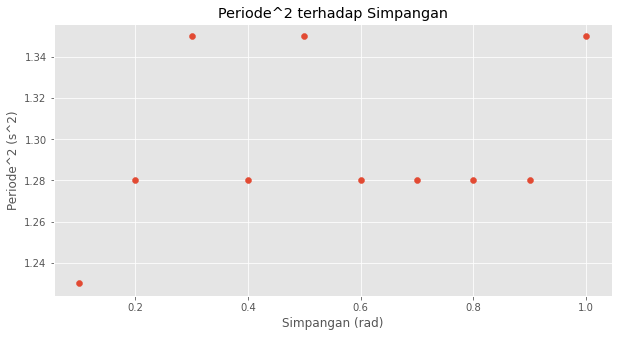

In [ ]:
# Mendefinisikan variabel bebas dan terikat
x = data2[["Simpangan (rad)"]]
y = data2[["Periode^2 (s^2)"]]

# Membuat plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y)
plt.title("Periode^2 terhadap Simpangan")
plt.xlabel("Simpangan (rad)")
plt.ylabel("Periode^2 (s^2)");

# Save plot dalam bentuk png
plt.savefig("Grafik Percobaan 2.png")

## Percobaan 3: Menghitung Momen Inersia Benda dan Sistem

In [ ]:
data3 = pd.DataFrame({"N (buah)":[i for i in range(1, 9)], "tqb (s)":[18, 19, 21, 22, 23, 24, 25, 26], "tbp (s)":[18, 18, 18, 19, 19, 19, 20, 20]})

In [ ]:
data3.shape

(8, 3)

In [ ]:
N = 15
data3["Periode QB (s)"] = (data3["tqb (s)"] / N).round(2)
data3["Periode^2 QB (s^2)"] = (data3["Periode QB (s)"]**2).round(2)
data3["Periode BP (s)"] = (data3["tbp (s)"] / N).round(2)
data3["Periode^2 BP (s^2)"] = (data3["Periode BP (s)"]**2).round(2)

In [ ]:
data3.shape

(8, 7)

In [ ]:
data3

,N (buah),tqb (s),tbp (s),Periode QB (s),Periode^2 QB (s^2),Periode BP (s),Periode^2 BP (s^2)
0,1,18,18,1.20,1.44,1.20,1.44
1,2,19,18,1.27,1.61,1.20,1.44
2,3,21,18,1.40,1.96,1.20,1.44
3,4,22,19,1.47,2.16,1.27,1.61
4,5,23,19,1.53,2.34,1.27,1.61
5,6,24,19,1.60,2.56,1.27,1.61
6,7,25,20,1.67,2.79,1.33,1.77
7,8,26,20,1.73,2.99,1.33,1.77


In [ ]:
data3["xy1"] = data3["N (buah)"]*data3["Periode^2 QB (s^2)"]
data3["xy2"] = data3["N (buah)"]*data3["Periode^2 BP (s^2)"]
data3["x2"] = data3["N (buah)"]**2  

In [ ]:
data3

,N (buah),tqb (s),tbp (s),Periode QB (s),Periode^2 QB (s^2),Periode BP (s),Periode^2 BP (s^2),xy1,xy2,x2
0,1,18,18,1.20,1.44,1.20,1.44,1.44,1.44,1
1,2,19,18,1.27,1.61,1.20,1.44,3.22,2.88,4
2,3,21,18,1.40,1.96,1.20,1.44,5.88,4.32,9
3,4,22,19,1.47,2.16,1.27,1.61,8.64,6.44,16
4,5,23,19,1.53,2.34,1.27,1.61,11.70,8.05,25
5,6,24,19,1.60,2.56,1.27,1.61,15.36,9.66,36
6,7,25,20,1.67,2.79,1.33,1.77,19.53,12.39,49
7,8,26,20,1.73,2.99,1.33,1.77,23.92,14.16,64


In [ ]:
data3.describe()

,N (buah),tqb (s),tbp (s),Periode QB (s),Periode^2 QB (s^2),Periode BP (s),Periode^2 BP (s^2),xy1,xy2,x2
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000
mean,4.50000,22.250000,18.875000,1.483750,2.231250,1.258750,1.586250,11.211250,7.417500,25.50000
std,2.44949,2.815772,0.834523,0.186849,0.547525,0.054625,0.138041,7.951064,4.511657,22.58318
min,1.00000,18.000000,18.000000,1.200000,1.440000,1.200000,1.440000,1.440000,1.440000,1.00000
25%,2.75000,20.500000,18.000000,1.367500,1.872500,1.200000,1.440000,5.215000,3.960000,7.75000
50%,4.50000,22.500000,19.000000,1.500000,2.250000,1.270000,1.610000,10.170000,7.245000,20.50000
75%,6.25000,24.250000,19.250000,1.617500,2.617500,1.285000,1.650000,16.402500,10.342500,39.25000
max,8.00000,26.000000,20.000000,1.730000,2.990000,1.330000,1.770000,23.920000,14.160000,64.00000


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1215.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           3.72e-08
Time:                        15:22:25   Log-Likelihood:                 15.263
No. Observations:                   8   AIC:                            -26.53
Df Residuals:                       6   BIC:                            -26.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2279      0.032     38.004      0.0

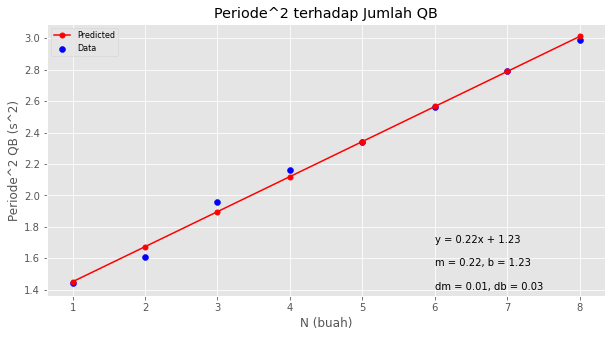

In [ ]:
# Menggunakan Library Statsmodels

# Mendefinisikan variabel bebas dan terikat
x = np.array(data3["N (buah)"])
y = np.array(data3["Periode^2 QB (s^2)"])

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("Periode^2 terhadap Jumlah QB")
plt.xlabel("N (buah)")
plt.ylabel("Periode^2 QB (s^2)")
plt.text(6, 1.7, "y = " + str(results.params[1].round(2)) + "x + " + str(results.params[0].round(2)))
plt.text(6, 1.55, "m = " + str(results.params[1].round(2)) + ", b = " + str(results.params[0].round(2)))
plt.text(6, 1.4, "dm = " + str(results.bse[1].round(2)) + ", db = " + str(results.bse[0].round(2)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Grafik Percobaan 3.png")

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     49.37
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           0.000415
Time:                        15:29:01   Log-Likelihood:                 13.914
No. Observations:                   8   AIC:                            -23.83
Df Residuals:                       6   BIC:                            -23.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3468      0.038     35.216      0.0

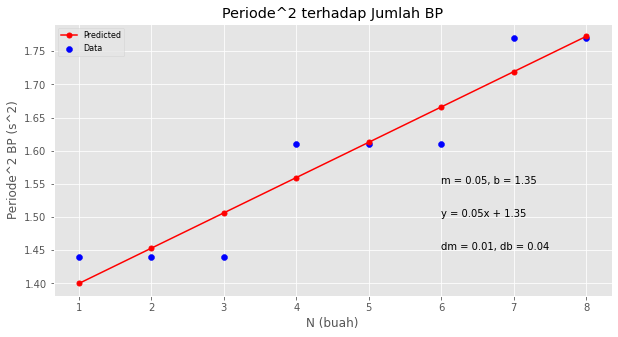

In [ ]:
# Menggunakan Library Statsmodels

# Mendefinisikan variabel bebas dan terikat
x = np.array(data3["N (buah)"])
y = np.array(data3["Periode^2 BP (s^2)"])

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("Periode^2 terhadap Jumlah BP")
plt.xlabel("N (buah)")
plt.ylabel("Periode^2 BP (s^2)")
plt.text(6, 1.50, "y = " + str(results.params[1].round(2)) + "x + " + str(results.params[0].round(2)))
plt.text(6, 1.55, "m = " + str(results.params[1].round(2)) + ", b = " + str(results.params[0].round(2)))
plt.text(6, 1.45, "dm = " + str(results.bse[1].round(2)) + ", db = " + str(results.bse[0].round(2)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Grafik Percobaan 3.png")

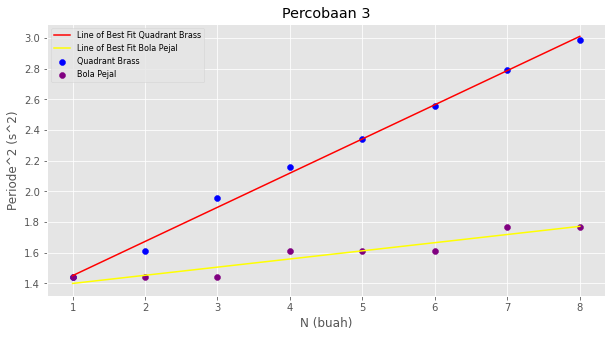

In [ ]:
# Mendefinisikan variabel bebas dan terikat
x = data3[["N (buah)"]]
y1 = data3[["Periode^2 QB (s^2)"]]
y2 = data3[["Periode^2 BP (s^2)"]]

# Menggunakan linear regression dari scikitlearn
model1 = LinearRegression()
model1.fit(x, y1)
y_preds1 = model1.predict(x)
model2 = LinearRegression()
model2.fit(x, y2)
y_preds2 = model2.predict(x)

# Membuat plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y1, color = "blue", label = "Quadrant Brass")
plt.plot(x, y_preds1, "-", color = "red", lw = 1.5, ms = 5, label = "Line of Best Fit Quadrant Brass")
plt.scatter(x, y2, color = "purple", label = "Bola Pejal")
plt.plot(x, y_preds2, "-", color = "yellow", lw = 1.5, ms = 5, label = "Line of Best Fit Bola Pejal")
plt.title("Percobaan 3")
plt.xlabel("N (buah)")
plt.ylabel("Periode^2 (s^2)")
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Grafik Percobaan 3.png")

# O1 - Rotasi Faraday



## Percobaan 1: Hukum Malus

In [ ]:
# Membuat data dalam format dataframe
# Melakukan konversi sudut dari derajat ke radian
tetha0 = 355
I0 = 85.9
x = np.arange(0, 185, 5)
y = np.array([85.9, 76.9, 75.1, 72, 60.6, 57.2, 
              55.3, 52.8, 47.3, 42.5, 36.3, 31.1, 
              27.3, 22.2, 18.3, 14.6, 12.3, 12.1, 
              10.1, 10, 13, 15.3, 18.7, 24,
              31.6, 33.1, 38.1, 45, 50.1, 55.8,
              61, 62.6, 68, 72.2, 77.1, 78.6, 79])
y_pred = I0*(np.cos(x*np.pi*(1/180)))**2

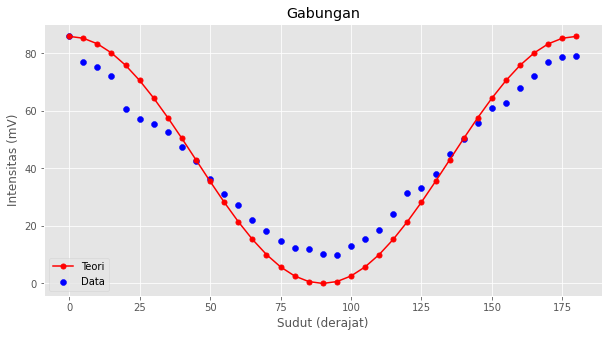

In [ ]:
# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_pred, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("Gabungan")
plt.xlabel("Sudut (derajat)")
plt.ylabel("Intensitas (mV)")
plt.legend(["Teori", "Data"], loc = "lower left", fontsize = 10);

# Save plot dalam bentuk png
plt.savefig("Grafik Percobaan 1.png")

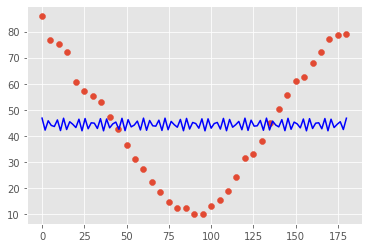

In [ ]:
# Melakukan Curve Fitting
def model_f(x, a, b, c):
  return a*np.cos(b*x*180*(1/np.pi)) + c

popt, pcov = curve_fit(model_f, x, y)

a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(x), max(x), 100)
y_model = model_f(x_model, a_opt, b_opt, c_opt)

plt.scatter(x, y)
plt.plot(x_model, y_model, color='b')
plt.show()

## Percobaan 2: Menghitung Konstanta Verdet

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     20.82
Date:                Tue, 25 Oct 2022   Prob (F-statistic):             0.0197
Time:                        13:41:17   Log-Likelihood:                -10.432
No. Observations:                   5   AIC:                             24.86
Df Residuals:                       3   BIC:                             24.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3115      2.063      1.120      0.3

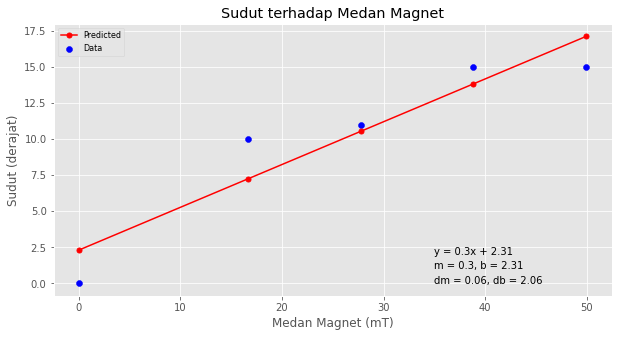

In [ ]:
# Menggunakan Library Statsmodels

# Mendefinisikan variabel bebas dan terikat
x = np.array([0, 16.65, 27.75, 38.85, 49.95])
y = np.array([0, 10, 11, 15, 15])

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("Sudut terhadap Medan Magnet")
plt.xlabel("Medan Magnet (mT)")
plt.ylabel("Sudut (derajat)")
plt.text(35, 2, "y = " + str(results.params[1].round(2)) + "x + " + str(results.params[0].round(2)))
plt.text(35, 1, "m = " + str(results.params[1].round(2)) + ", b = " + str(results.params[0].round(2)))
plt.text(35, 0, "dm = " + str(results.bse[1].round(2)) + ", db = " + str(results.bse[0].round(2)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Grafik Percobaan 1.png");

In [ ]:
data = pd.DataFrame({"x":x, "y":y, "xy":x*y, "x2":x**2})

In [ ]:
data.describe()

,x,y,xy,x2
count,5.000000,5.000000,5.000000,5.000000
mean,26.640000,10.200000,360.750000,1010.322000
std,19.385317,6.140033,304.618665,1008.611389
min,0.000000,0.000000,0.000000,0.000000
25%,16.650000,10.000000,166.500000,277.222500
50%,27.750000,11.000000,305.250000,770.062500
75%,38.850000,15.000000,582.750000,1509.322500
max,49.950000,15.000000,749.250000,2495.002500


In [ ]:
data

,x,y,xy,x2
0,0.00,0,0.00,0.0000
1,16.65,10,166.50,277.2225
2,27.75,11,305.25,770.0625
3,38.85,15,582.75,1509.3225
4,49.95,15,749.25,2495.0025


In [ ]:
print(data["x"].sum())
print(data["y"].sum())
print(data["xy"].sum())
print(data["x2"].sum())

133.2
51
1803.75
5051.610000000001


In [ ]:
# Menghitung Konstanta Verdet dalam rad/Tm
print("V =", results.params[1].round(2)/10)

V = 0.03


# O3 - Fotometri

## Percobaan 1: Hukum Kuadrat Terbalik

In [ ]:
# Load data kedalam dataframe
data1 = pd.DataFrame({"R1":[10, 14, 18, 22, 26, 30, 34, 38], "R2":[9, 12, 15, 20, 26, 28, 30, 33]})
data2 = pd.DataFrame({"R1":[10, 14, 18, 22, 26, 30, 34, 38], "R2":[9, 11, 14, 20, 26, 29, 34, 40]})
data3 = pd.DataFrame({"R1":[10, 14, 18, 22, 26, 30, 34, 38], "R2":[12, 14, 21, 24, 33, 38, 43, 49]})
data4 = pd.DataFrame({"R1":[10, 14, 18, 22, 26, 30, 34, 38], "R2":[16, 20, 25, 33, 40, 47, 54, 58]})
mydata = [data1, data2, data3, data4]

In [ ]:
# Membuat variabel bebas dan terikat sesuai
for i in mydata:
  x = i["R1"]**2
  y = i["R2"]**2
  i["x2"] = x
  i["y2"] = y

In [ ]:
data1

,R1,R2,x2,y2
0,10,9,100,81
1,14,12,196,144
2,18,15,324,225
3,22,20,484,400
4,26,26,676,676
5,30,28,900,784
6,34,30,1156,900
7,38,33,1444,1089


In [ ]:
def autoplot(data):
  # Menggunakan Library Statsmodels

  # Mendefinisikan variabel bebas dan terikat
  x = np.array(data["x2"])
  y = np.array(data["y2"])

  # Membuat Garis Regresi menggunakan Ordinary Least Square
  model = sm.OLS(y, sm.add_constant(x))
  results = model.fit()
  y_preds = results.predict(sm.add_constant(x))
  print(results.summary())

  # Membuat Plot
  plt.figure(figsize = (10, 5))
  plt.scatter(x, y, color = "blue", label = "Data")
  plt.plot(x, y_preds, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
  plt.title("ND Filter 25%")
  plt.xlabel("R1^2 (cm^2)")
  plt.ylabel("R2^2 (cm^2)")
  plt.text(1000, 600, "y = " + str(results.params[1].round(2)) + "x + " + str(results.params[0].round(2)))
  plt.text(1000, 400, "m = " + str(results.params[1].round(2)) + ", b = " + str(results.params[0].round(2)))
  plt.text(1000, 200, "dm = " + str(results.bse[1].round(2)) + ", db = " + str(results.bse[0].round(2)))
  plt.legend(loc = "upper left", fontsize = 8);

  # Save plot dalam bentuk png
  plt.savefig("Grafik Percobaan 1.png")

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1023.
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           6.21e-08
Time:                        05:56:44   Log-Likelihood:                -46.789
No. Observations:                   8   AIC:                             97.58
Df Residuals:                       6   BIC:                             97.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -63.8442     61.175     -1.044      0.3

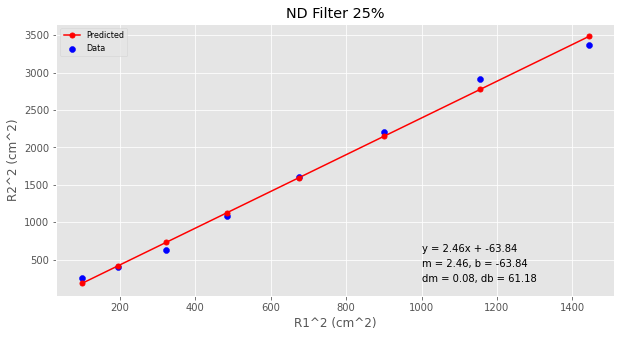

In [ ]:
autoplot(data4)

## Percobaan 2: Hukum Malus

In [ ]:
# Load data kedalam dataframe
data1 = pd.DataFrame({"tetha":[0, 15, 30, 45, 60, 75], "R0":[26, 28, 33, 36, 52, 148]})
data2 = pd.DataFrame({"tetha":[0, 15, 30, 45, 60, 75], "R0":[33, 37, 41, 42, 65, 137]})
data3 = pd.DataFrame({"tetha":[0, 15, 30, 45, 60, 75],"R0":[60, 65, 69, 74, 104, 171]})
data4 = pd.DataFrame({"tetha":[0, 15, 30, 45, 60, 75], "R0":[66, 74, 89, 119, 150, 216]})
mydata = [data1, data2, data3, data4]

In [ ]:
# Membuat variabel bebas dan terikat sesuai
for i in mydata:
  i["tetha"] = i["tetha"]*np.pi*(1/180)
  x = np.cos(i["tetha"])**2
  y = 1/i["R0"]**2
  i["cos^2(tetha)"] = x
  i["1/R0^2"] = y
  i["x2"] = i["cos^2(tetha)"]**2
  i["xy"] = i["cos^2(tetha)"]*i["1/R0^2"]

In [ ]:
# Mengambil dan melihat data
data4

,tetha,R0,cos^2(tetha),1/R0^2,x2,xy
0,0.000000,66,1.000000,0.000230,1.000000,0.000230
1,0.261799,74,0.933013,0.000183,0.870513,0.000170
2,0.523599,89,0.750000,0.000126,0.562500,0.000095
3,0.785398,119,0.500000,0.000071,0.250000,0.000035
4,1.047198,150,0.250000,0.000044,0.062500,0.000011
5,1.308997,216,0.066987,0.000021,0.004487,0.000001


In [ ]:
for i in data4.columns:
  print(data4[i].sum())
print(data4["cos^2(tetha)"].mean(), data4["1/R0^2"].mean())

3.9269908169872414
714
3.5000000000000004
0.0006749245417298588
2.7500000000000004
0.0005424907070932917
0.5833333333333334 0.00011248742362164313


In [ ]:
def autoplot(data):
  # Menggunakan Library Statsmodels

  # Mendefinisikan variabel bebas dan terikat
  x = np.array(data["cos^2(tetha)"])
  y = np.array(data["1/R0^2"])

  # Membuat Garis Regresi menggunakan Ordinary Least Square
  model = sm.OLS(y, sm.add_constant(x))
  results = model.fit()
  y_preds = results.predict(sm.add_constant(x))
  print(results.summary())

  # Membuat Plot
  plt.figure(figsize = (10, 5))
  plt.scatter(x, y, color = "blue", label = "Data")
  plt.plot(x, y_preds, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
  plt.title("ND Filter 25%")
  plt.xlabel("cos^2(tetha)")
  plt.ylabel("1/R0^2")
  plt.text(0.75, 0.00003, "y = " + str(results.params[1].round(6)) + "x + " + str(results.params[0].round(6)))
  plt.text(0.75, 0.00002, "m = " + str(results.params[1].round(6)) + ", b = " + str(results.params[0].round(6)))
  plt.text(0.75, 0.00001, "dm = " + str(results.bse[1].round(6)) + ", db = " + str(results.bse[0].round(6)))
  plt.legend(loc = "upper left", fontsize = 8);

  # Save plot dalam bentuk png
  plt.savefig("Grafik Percobaan 1.png")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     55.88
Date:                Sun, 06 Nov 2022   Prob (F-statistic):            0.00171
Time:                        05:56:45   Log-Likelihood:                 56.616
No. Observations:                   6   AIC:                            -109.2
Df Residuals:                       4   BIC:                            -109.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.004e-05    1.9e-05     -0.528      0.6

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


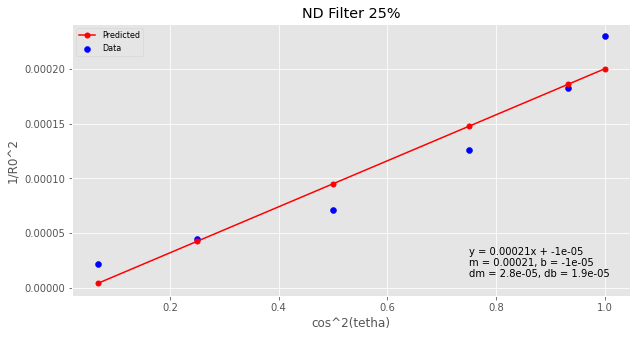

In [ ]:
# Menggunakan fungsi autoplot
autoplot(data4)

# SSP1 - Efek Hall Metal

## Percobaan 1: Kalibrasi Medan Magnet

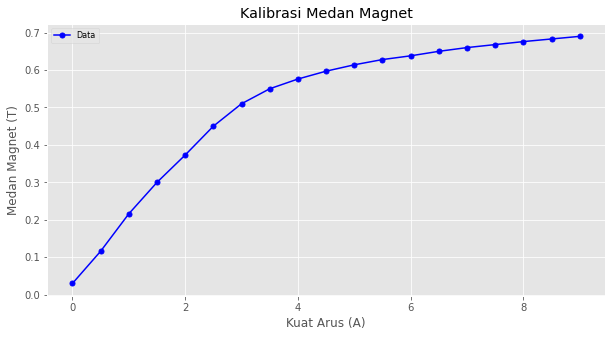

In [ ]:
# Menggunakan Library Statsmodels

# Mendefinisikan variabel bebas dan terikat
x = np.arange(0, 9.5, 0.5)
y = np.array([30, 116, 216, 300, 373, 450, 510, 550, 576, 
              597, 614, 628, 638, 650, 660, 668, 676, 683, 690])*10**-3

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.plot(x, y, "o-", color = "blue", lw = 1.5, ms = 5, label = "Data")
plt.title("Kalibrasi Medan Magnet")
plt.xlabel("Kuat Arus (A)")
plt.ylabel("Medan Magnet (T)")
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Kalibrasi Medan Magnet.png")

## Percobaan 2: Tegangan Hall Fungsi Medan Magnet

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     138.0
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.45e-07
Time:                        12:15:29   Log-Likelihood:                 81.625
No. Observations:                  13   AIC:                            -159.3
Df Residuals:                      11   BIC:                            -158.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1425      0.000    435.493      0.0

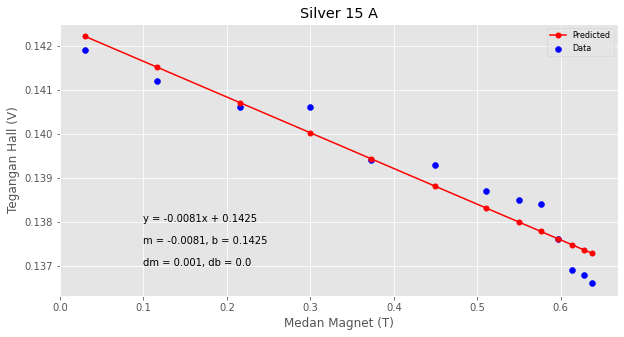

In [ ]:
# Menggunakan Library Statsmodels

# Mendefinisikan variabel bebas dan terikat
x = np.array([30, 116, 216, 300, 373, 450, 510, 550, 576, 597, 614, 628, 638])*10**-3
y = np.array([141.9, 141.2, 140.6, 140.6, 139.4, 139.3, 138.7, 
              138.5, 138.4, 137.6, 136.9, 136.8, 136.6])*10**-3

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("Silver 15 A")
plt.xlabel("Medan Magnet (T)")
plt.ylabel("Tegangan Hall (V)")
plt.text(0.1, 0.138, "y = " + str(results.params[1].round(4)) + "x + " + str(results.params[0].round(4)))
plt.text(0.1, 0.1375, "m = " + str(results.params[1].round(4)) + ", b = " + str(results.params[0].round(4)))
plt.text(0.1, 0.137, "dm = " + str(results.bse[1].round(3)) + ", db = " + str(results.bse[0].round(3)))
plt.legend(loc = "upper right", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Silver 15 A.png")

# SSP2 - Efek Hall Semikonduktor

## Percobaan 1: Tegangan Hall Fungsi Arus

In [ ]:
dir = ["/content/P-60.txt", "/content/P-80.txt", "/content/P-100.txt", 
       "/content/N-60.txt", "/content/N-80.txt", "/content/N-100.txt"]
data1 = []

for i, j in zip(dir, range(1, 7)):
  data = pd.read_csv(i, delimiter = "\t")
  data["y"] = data["y"].fillna(data["Unnamed: 1"])
  data.drop(["Unnamed: 1"], axis = 1, inplace = True)
  data1.append(data)

In [ ]:
data1[5]

,x,y
0,0.000000,0.00165
1,0.000945,0.00075
2,0.001935,0.00000
3,0.002670,-0.00060
4,0.003315,-0.00110
5,0.005565,-0.00280
6,0.006465,-0.00375
7,0.007935,-0.00510
8,0.008955,-0.00605
9,0.009990,-0.00695


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.610e+05
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           3.45e-54
Time:                        09:22:09   Log-Likelihood:                 232.74
No. Observations:                  30   AIC:                            -461.5
Df Residuals:                      28   BIC:                            -458.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018   3.87e-05     47.719      0.0

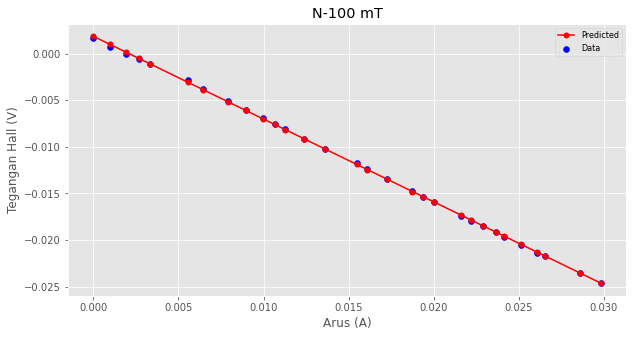

In [ ]:
# Menggunakan Library Statsmodels

# Mendefinisikan variabel bebas dan terikat
x = np.array(data1[5]["x"])
y = np.array(data1[5]["y"])

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("N-100 mT")
plt.xlabel("Arus (A)")
plt.ylabel("Tegangan Hall (V)")
# plt.text(0, -0.0125, "y = " + str(results.params[1].round(2)) + "x + " + str(results.params[0].round(2)))
# plt.text(0, -0.01375, "m = " + str(results.params[1].round(2)) + ", b = " + str(results.params[0].round(2)))
# plt.text(0, -0.0150, "dm = " + str(results.bse[1].round(2)) + ", db = " + str(results.bse[0].round(2)))
plt.legend(loc = "upper right", fontsize = 8);

# Save plot dalam bentuk png
# plt.savefig("N-100mT.png")

# Diketahui
m = results.params[1]
delta = results.bse[1]
B = 0.1 
d = 10**-3
e = 1.6*10**-19
b = 10**-2
w = 2*10**-2

# Nilai yang dicari
ns = B/(e*d*m)
Rh = (m*d)/B
delns = (B*delta)/(e*d*m**2)
k = (delns/ns)*100
vd = m/(b*B)
mun = (m*w)/(b*B)

print("ns:", ns)
print("Rh:", Rh)
print("delns:", delns)
print("k:", k)
print("vd(I):", vd)
print("mun(I/U):", mun)

In [ ]:
# Diketahui
m = results.params[1]
delta = results.bse[1]
B = 0.06 
d = 10**-3
e = 1.6*10**-19
b = 10**-2
w = 2*10**-2

# Nilai yang dicari
ns = B/(e*d*m)
Rh = (m*d)/B
delns = (B*delta)/(e*d*m**2)
k = (delns/ns)*100
vd = m/(b*B)
mun = (m*w)/(b*B)

print("ns:", ns)
print("Rh:", Rh)
print("delns:", delns)
print("k:", k)
print("vd(I):", vd)
print("mun(I/U):", mun)

ns: 8.075170334054703e+20
Rh: 0.007739774817680844
delns: 7.775696185209604e+18
k: 0.9629142003875567
vd(I): 773.9774817680843
mun(I/U): 15.479549635361685


## Percobaan 2: Tegangan Hall Fungsi Medan Magnet

In [ ]:
dir = ["/content/P-0.01A.txt", "/content/P-0.02A.txt", "/content/P-0.03A.txt", 
       "/content/N-0.01A.txt", "/content/N-0.02A.txt", "/content/N-0.03A.txt"]
data2 = []

for i, j in zip(dir, range(1, 7)):
  data = pd.read_csv(i, delimiter = "\t")
  data2.append(data)

In [ ]:
data2[0] = data2[0].iloc[:28, :]

In [ ]:
data2[5]

,x,y
0,1.55,0.00205
1,3.45,0.00155
2,4.55,0.00130
3,5.80,0.00095
4,6.90,0.00065
5,8.15,0.00035
6,10.60,-0.00030
7,11.90,-0.00060
8,15.80,-0.00170
9,16.90,-0.00195


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.869e+04
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           2.53e-59
Time:                        11:06:34   Log-Likelihood:                 270.22
No. Observations:                  39   AIC:                            -536.4
Df Residuals:                      37   BIC:                            -533.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029   7.13e-05     40.037      0.0

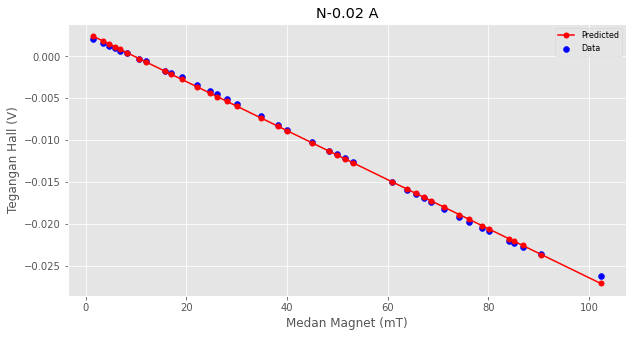

In [ ]:
# Menggunakan Library Statsmodels

# Mendefinisikan variabel bebas dan terikat
x = np.array(data2[0]["x"])
y = np.array(data2[0]["y"])

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("N-0.02 A")
plt.xlabel("Medan Magnet (mT)")
plt.ylabel("Tegangan Hall (V)")
# plt.text(0, -0.006, "y = " + str(results.params[1].round(6)) + "x + " + str(results.params[0].round(4)))
# plt.text(0, -0.007, "m = " + str(results.params[1].round(6)) + ", b = " + str(results.params[0].round(4)))
# plt.text(0, -0.008, "dm = " + str(results.bse[1].round(6)) + ", db = " + str(results.bse[0].round(6)))
plt.legend(loc = "upper right", fontsize = 8);

# Save plot dalam bentuk png
# plt.savefig("N-0.02A.png")

m = results.params[1]
delta = results.bse[1]
I = 0.03
d = 10**-3
Rh = (m*d)/I
delrh = (d/I)*delta
k = (delrh/Rh)*100

print("Rh:", Rh)
print("delrh:", delrh)
print("k:", k)

# SSP3 - Hysteresis

In [ ]:
# Membuat list berisi direktori file txt yang ada dan membacanya dalam bentuk tabel
# Note: Upload text file untuk masing-masing batang yang berjumlah 4 file
dir = ["/content/1V.txt", "/content/1.5V.txt", "/content/2V.txt", "/content/2.5V.txt"]
mydata = []

for i, j in zip(dir, range(1, 5)):
  data = pd.read_csv(i, delimiter = "\t")
  mydata.append(data)

In [ ]:
# Membaca tabel
mydata[0]

,MIN=0,-1,-1.1,0,0.1,-2
0,MAX=40,1,1,1,1,2
1,SCALE=40,"0,5","0,5","0,5","0,5",1
2,DEC=2,3,3,0,0,2
3,"DEF=""Time"" t / s",Current I_A1 / A,Voltage U_B1 / V,Relay R_1,Voltage source S_1,Magnetic flux &F / Vs
4,0,"0,0005","0,0005",0,1,0
...,...,...,...,...,...,...
708,"35,198","0,0075","-0,043",1,1,"0,0117887500000005"
709,"35,248","0,005","-0,0425",1,1,"0,0096512500000003"
710,"35,298","0,0025","-0,045",1,1,"0,00746375000000043"
711,"35,348","0,0005","-0,044",1,1,"0,00523875000000055"


## Percobaan 1: Hubungan Kuat Arus dengan Fluks Magnet

In [ ]:
# Membersihkan dataframe dan mengubah nama kolom
cols = ["Waktu (s)", "Kuat Arus (A)", "Tegangan (V)", "Relay", "Sumber Tegangan", "Fluks Magnet (Wb)"]
mydata_clean = []
list_data = []

for i in range(4):
  # Mengambil baris keempat kebawah saja
  data = mydata[i].loc[4:, :]
  data.columns = cols
  data.reset_index(inplace = True, drop = True)
  mydata_clean.append(data)

  # Mengganti koma dengan titik, mengambil kolom kuat arus dan fluks magnet
  # serta mengubah tipe data ke float
  mydata_clean[i]["Kuat Arus (A)"] = mydata_clean[i].iloc[:, 1].str.replace(",",".")
  mydata_clean[i]["Fluks Magnet (Wb)"] = mydata_clean[i].iloc[:, 5].str.replace(",",".")
  list_data.append(mydata_clean[i][["Kuat Arus (A)", "Fluks Magnet (Wb)"]])
  list_data[i] = list_data[i].astype("float")

In [ ]:
# Membaca tabel kembali
list_data[0]

,Kuat Arus (A),Fluks Magnet (Wb)
0,0.0005,0.000000
1,0.0010,-0.000012
2,0.0030,0.000307
3,0.0060,0.000969
4,0.0085,0.001682
...,...,...
704,0.0075,0.011789
705,0.0050,0.009651
706,0.0025,0.007464
707,0.0005,0.005239


In [ ]:
# Menyimpan Data dalam format xlsx untuk analisis di excel
# Note: Untuk bahan lain cukup rename file_name menjadi Bahani seperti Bahan2
file_name = ["Batang 5' - 1V.txt", "Batang 5' - 1,5V.txt", "Batang 5' - 2V.txt", "Batang 5' - 2,5V.txt"]
for i, j in zip(range(4), file_name):
  list_data[i].to_csv(j, sep = "\t",index = False)

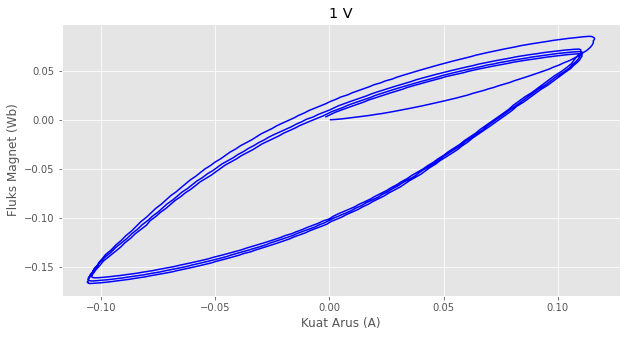

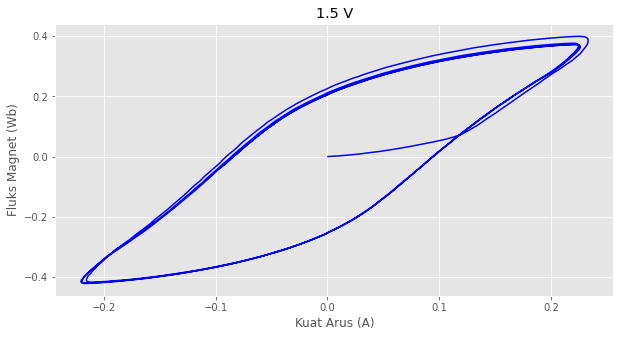

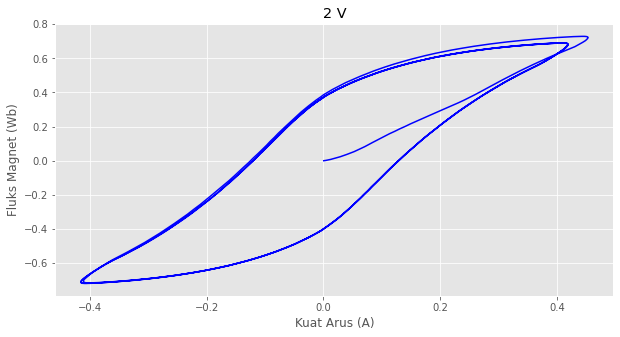

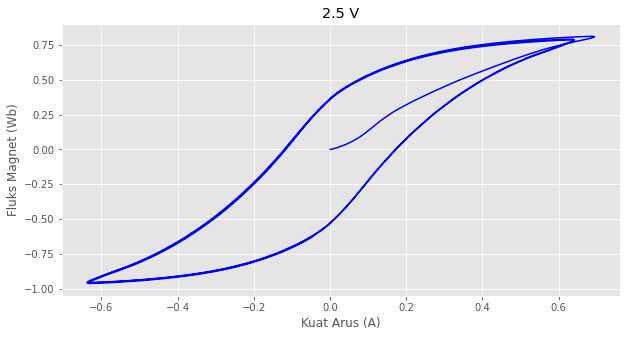

In [ ]:
# Membuat dan Menyimpan Plot
file_name = ["Grafik Batang 5' - 1V.png", "Grafik Batang 5' - 1,5V.png", 
             "Grafik Batang 5' - 2V.png", "Grafik Batang 5' - 2,5V.png"]
for i, j in zip(range(4), file_name):
  x = np.array(list_data[i]["Kuat Arus (A)"])
  y = np.array(list_data[i]["Fluks Magnet (Wb)"])
  plt.figure(figsize = (10, 5))
  if i == 1:
    plt.plot(x, y, color = "blue", label = "Data")
    plt.title(str(i+0.5) + " V")
    plt.xlabel("Kuat Arus (A)")
    plt.ylabel("Fluks Magnet (Wb)")
    plt.savefig(j)
    plt.show()
  elif i == 2:
    plt.plot(x, y, color = "blue", label = "Data")
    plt.title(str(i) + " V")
    plt.xlabel("Kuat Arus (A)")
    plt.ylabel("Fluks Magnet (Wb)")
    plt.savefig(j)
    plt.show()
  elif i == 3:
    plt.plot(x, y, color = "blue", label = "Data")
    plt.title(str(i-0.5) + " V")
    plt.xlabel("Kuat Arus (A)")
    plt.ylabel("Fluks Magnet (Wb)")
    plt.savefig(j)
    plt.show()
  else:
    plt.plot(x, y, color = "blue", label = "Data")
    plt.title(str(i+1) + " V")
    plt.xlabel("Kuat Arus (A)")
    plt.ylabel("Fluks Magnet (Wb)")
    plt.savefig(j)
    plt.show()

# EM1 - Torsi Magnetik

## Percobaan 1: Eksperimen Statis

In [ ]:
df = pd.DataFrame({"Arus":[2, 2.2, 2.4, 2.6, 2.8], "Panjang Lengan":[0.05, 0.06, 0.07, 0.08, 0.09]})

In [ ]:
df.head()

,Arus,Panjang Lengan
0,2.0,0.05
1,2.2,0.06
2,2.4,0.07
3,2.6,0.08
4,2.8,0.09


In [ ]:
df["Medan Magnet"] = 0.00423 * df["Arus"]

In [ ]:
df.head()

,Arus,Panjang Lengan,Medan Magnet
0,2.0,0.05,0.008460
1,2.2,0.06,0.009306
2,2.4,0.07,0.010152
3,2.6,0.08,0.010998
4,2.8,0.09,0.011844


/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.113e+30
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           1.88e-45
Time:                        08:10:18   Log-Likelihood:                 184.41
No. Observations:                   5   AIC:                            -364.8
Df Residuals:                       3   BIC:                            -365.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0500   1.15e-16  -4.36e+14      0.0

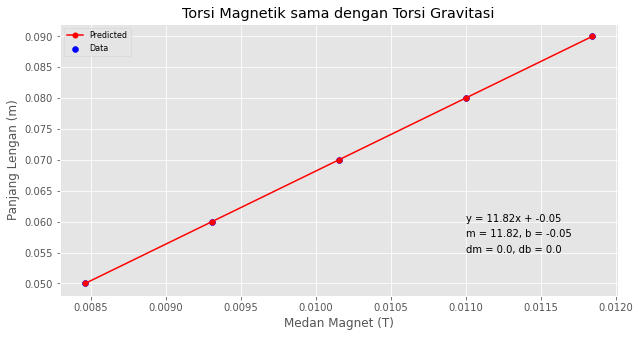

In [ ]:
# Menggunakan Library Statsmodels

# Mendefinisikan variabel bebas dan terikat
x = np.array(df["Medan Magnet"])
y = np.array(df["Panjang Lengan"])

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("Torsi Magnetik sama dengan Torsi Gravitasi")
plt.xlabel("Medan Magnet (T)")
plt.ylabel("Panjang Lengan (m)")
plt.text(0.011, 0.06, "y = " + str(results.params[1].round(2)) + "x + " + str(results.params[0].round(2)))
plt.text(0.011, 0.0575, "m = " + str(results.params[1].round(2)) + ", b = " + str(results.params[0].round(2)))
plt.text(0.011, 0.055, "dm = " + str(results.bse[1].round(2)) + ", db = " + str(results.bse[0].round(2)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Grafik Percobaan 1.png")

## Percobaan 2: Osilasi Harmonik Pendulum Sferis

In [ ]:
df = pd.DataFrame({"Arus":[1, 1.5, 2, 2.5, 3, 3.5], "T10":[18, 14, 13, 11, 10, 9]})

In [ ]:
df

,Arus,T10
0,1.0,18
1,1.5,14
2,2.0,13
3,2.5,11
4,3.0,10
5,3.5,9


In [ ]:
df["Periode"] = df["T10"]/10

In [ ]:
df

,Arus,T10,Periode
0,1.0,18,1.8
1,1.5,14,1.4
2,2.0,13,1.3
3,2.5,11,1.1
4,3.0,10,1.0
5,3.5,9,0.9


In [ ]:
df["Periode^2"] = df["Periode"] ** 2
df["1/Medan Magnet"] = 1 / (df["Arus"] * 0.00423)
df["Medan Magnet"] = df["Arus"] * 0.00423

In [ ]:
df

,Arus,T10,Periode,Periode^2,1/Medan Magnet,Medan Magnet
0,1.0,18,1.8,3.24,236.406619,0.004230
1,1.5,14,1.4,1.96,157.604413,0.006345
2,2.0,13,1.3,1.69,118.203310,0.008460
3,2.5,11,1.1,1.21,94.562648,0.010575
4,3.0,10,1.0,1.00,78.802206,0.012690
5,3.5,9,0.9,0.81,67.544748,0.014805


/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     372.7
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           4.24e-05
Time:                        08:45:18   Log-Likelihood:                 6.3781
No. Observations:                   6   AIC:                            -8.756
Df Residuals:                       4   BIC:                            -9.173
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1076      0.100     -1.074      0.3

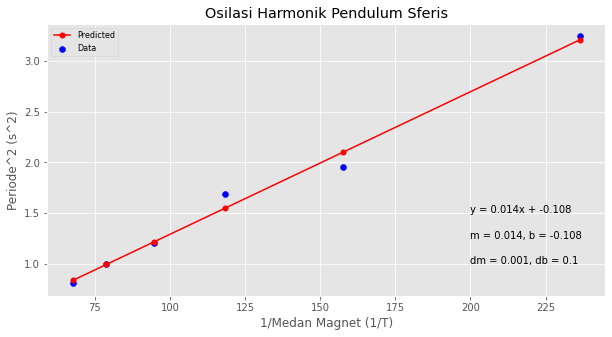

In [ ]:
# Menggunakan Library Statsmodels

# Mendefinisikan variabel bebas dan terikat
x = np.array(df["1/Medan Magnet"])
y = np.array(df["Periode^2"])

# Membuat Garis Regresi menggunakan Ordinary Least Square
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
y_preds = results.predict(sm.add_constant(x))
print(results.summary())

# Membuat Plot
plt.figure(figsize = (10, 5))
plt.scatter(x, y, color = "blue", label = "Data")
plt.plot(x, y_preds, "o-", color = "red", lw = 1.5, ms = 5, label = "Predicted")
plt.title("Osilasi Harmonik Pendulum Sferis")
plt.xlabel("1/Medan Magnet (1/T)")
plt.ylabel("Periode^2 (s^2)")
plt.text(200, 1.5, "y = " + str(results.params[1].round(3)) + "x + " + str(results.params[0].round(3)))
plt.text(200, 1.25, "m = " + str(results.params[1].round(3)) + ", b = " + str(results.params[0].round(3)))
plt.text(200, 1, "dm = " + str(results.bse[1].round(3)) + ", db = " + str(results.bse[0].round(3)))
plt.legend(loc = "upper left", fontsize = 8);

# Save plot dalam bentuk png
plt.savefig("Grafik Percobaan 2.png")

# EM2 - Microwaves

## Percobaan 1: Distribusi Medan Transversal

In [ ]:
x = np.arange(-200, 201, 40)
y1 = np.array([157.5, 256, 305, 3081, 3700, 3890, 3671, 61.4, 52.5, 50.5, 50.4])
y2 = np.array([158, 1217, 2221, 2951, 3132, 1698, 855, 345, 170, 56, 49])

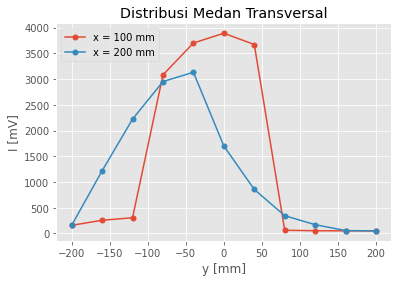

In [ ]:
plt.plot(x, y1, "o-", lw = 1.5, ms = 5, label = "x = 100 mm")
plt.plot(x, y2, "o-", lw = 1.5, ms = 5, label = "x = 200 mm")
plt.title("Distribusi Medan Transversal")
plt.xlabel("y [mm]")
plt.ylabel("I [mV]")
plt.legend(loc = "upper left")
plt.savefig("Distribusi Medan Transversal.png")

## Percobaan 2: Polarisasi

In [ ]:
x = np.arange(0, 181, 10)
y = np.array([75.9, 164.6, 337.6, 460, 492, 900, 1280, 2359, 
              3155, 3792, 3468, 3311, 2943, 2503, 2062, 1381, 
              821, 430, 190])

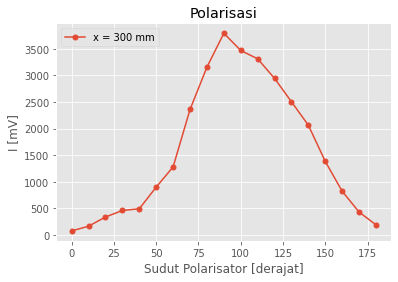

In [ ]:
plt.plot(x, y, "o-", lw = 1.5, ms = 5, label = "x = 300 mm")
plt.title("Polarisasi")
plt.xlabel("Sudut Polarisator [derajat]")
plt.ylabel("I [mV]")
plt.legend(loc = "upper left")
plt.savefig("Polarisasi.png");

# EM4 - Radiasi Termal

## Percobaan 1: Radiasi Termal

In [ ]:
Ihitam5 = 10.3
Iputih5 = 10
Ikasar5 = 5.3
Ihalus5 = 1.1

eputih5 = (Iputih5/Ihitam5) * 100
ekasar5 = (Ikasar5/Ihitam5) * 100
ehalus5 = (Ihalus5/Ihitam5) * 100
hasil = [eputih5, ekasar5, ehalus5]
print(hasil)

Ihitam6 = 9
Iputih6 = 8.8
Ikasar6 = 4.7
Ihalus6 = 1

eputih6 = (Iputih6/Ihitam6) * 100
ekasar6 = (Ikasar6/Ihitam6) * 100
ehalus6 = (Ihalus6/Ihitam6) * 100
hasil = [eputih6, ekasar6, ehalus6]
print(hasil)

[97.08737864077669, 51.45631067961165, 10.679611650485437]
[97.77777777777779, 52.22222222222223, 11.11111111111111]


## Percobaan 2: Absorbsi dan Transmisi

In [ ]:
I0 = 8.3

xkaca = 0.6
xheat = 0.4
xkertas = 0.005

Ikaca = 0.1
Iheat = 0.1
Ikertas = 0.7

material = [0.1, 0.1, 0.7]
def koefta(x = I0):
  T = x/I0
  A = -1 * np.log10(T)
  print("T:", T, "A:", A, "\n")
  return T

xs = [0.6, 0.4, 0.005]
def mu(x = 1, y = I0):
  mu = -1 * np.log(koefta(y)) * (1/x)
  print("mu:", mu, "\n")

for i, j in zip(xs, material):
  mu(x = i, y = j)

T: 0.012048192771084336 A: 1.919078092376074 

mu: 7.364734346327664 

T: 0.012048192771084336 A: 1.919078092376074 

mu: 11.047101519491495 

T: 0.08433734939759036 A: 1.073980052361817 

mu: 494.586091748257 



## Percobaan 3: Hukum Kuadrat Terbalik

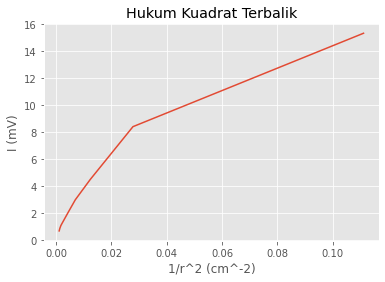

In [ ]:
x = 1 / (np.array([3, 6, 9, 12, 15, 18, 21, 24, 27, 30])**2)
y = np.array([15.3, 8.4, 4.5, 3, 2.1, 1.6, 1.3, 1.1, 0.9, 0.7])
plt.plot(x, y)
plt.title("Hukum Kuadrat Terbalik")
plt.xlabel("1/r^2 (cm^-2)")
plt.ylabel("I (mV)")
plt.savefig("HK Kuadrat Terbalik.png")

## Percobaan 4: Hukum Stefann Boltzmann

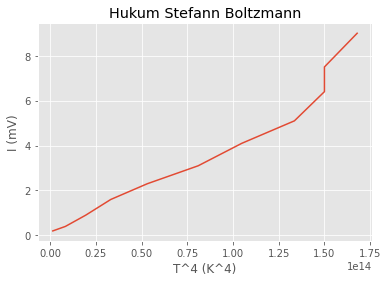

In [ ]:
x = np.array([0.014641, 0.083521, 0.194481, 0.331776, 0.531441, 0.81, 1.048576, 1.336336, 1.500625, 1.500625, 1.679616])*10**14
y = np.array([0.2, 0.4, 0.9, 1.6, 2.3, 3.1, 4.1, 5.1, 6.4, 7.5, 9])
plt.plot(x, y)
plt.title("Hukum Stefann Boltzmann")
plt.xlabel("T^4 (K^4)")
plt.ylabel("I (mV)")
plt.savefig("HK Stefan Boltzmann.png")